<a href="https://colab.research.google.com/github/francineimorais/id_w_titanic/blob/main/idwall_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<mark style="background-color: yellow;">**1.&nbsp;Planning**</mark>

## **Etapas do projeto**
* Definição do problema.
* Adquira dos dados.
* Análise exploratória.
* Modelagem/treinamento.
* Apresentação do resultados/deploy.
* Documentação.

## **Dataset description**
* https://www.kaggle.com/competitions/titanic/data?select=train.csv

## **Links auxiliares**
* https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/
* https://pycaret.gitbook.io/docs/
* https://shap.readthedocs.io/en/latest/

#<mark style="background-color: yellow;">**2. Install project dependencies**</mark>


In [ ]:
# install pandas-profiling for automate EDA
!pip install pandas-profiling

In [ ]:
# install pycaret
!pip install pycaret

In [ ]:
# model explainability
!pip install shap

#<mark style="background-color: yellow;">**3.&nbsp;Mount Google Drive**</mark>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<mark style="background-color: yellow;">**4.&nbsp;Importing packages**</mark>

In [64]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Model explainability
import shap  # package used to calculate Shap values

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

# Set global option to format floats with two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

#<mark style="background-color: yellow;">**5.&nbsp;Loading Data**</mark>

In [5]:
path_to_train = '/content/drive/MyDrive/Titanic/data/train.csv'
path_to_test = '/content/drive/MyDrive/Titanic/data/test.csv'

train_df = pd.read_csv(path_to_train)
test_df = pd.read_csv(path_to_test)
combine = [train_df, test_df]

#<mark style="background-color: yellow;">**6.&nbsp;Exploratory Data Analysis**</mark>


## **6.1&nbsp;Automate EDA**

In [6]:
#importing required packages
import pandas_profiling

# vertical concatenation
# concatenated = pd.concat([train_df, test_df], axis=0).sample(frac=1).reset_index(drop=True)
df = train_df.copy()

#descriptive statistics
pandas_profiling.ProfileReport(df)

<ipython-input-6-5c686e6c4642>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **6.2&nbsp;Variable overview**

In [7]:
# rows and columns of the data
print(train_df.shape)

# visualise the dataset
train_df.head()

(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                             Heikkinen, Miss. Laina  female 26.00      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                           Allen, Mr. William Henry    male 35.00      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  7.25   NaN        S  
1      0          PC 17599 71.28   C85        C  
2      0  STON/O2. 3101282  7.92   NaN        S  
3      0            113803 53.10  C123        S  
4      0            373450  8.05   NaN        S

In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **6.3&nbsp;Variable Types**


In [9]:
# let's identify the categorical variables
# we will capture those of type *object*
cat_vars = [var for var in train_df.columns if train_df[var].dtype == 'O']

# cast all variables as categorical
# train_df[cat_vars] = train_df[cat_vars].astype('O')

# number of categorical variables
len(cat_vars)

5

In [10]:
# now let's identify the numerical variables
num_vars = [var for var in train_df.columns if var not in cat_vars]

# number of numerical variables
len(num_vars)

7

## **6.4&nbsp;Missing values**

Let's go ahead and find out which variables of the dataset contain missing values.

In [11]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in train_df.columns if train_df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

train_df[vars_with_na].isnull().mean().sort_values(ascending=False)

Cabin      0.77
Age        0.20
Embarked   0.00
dtype: float64

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

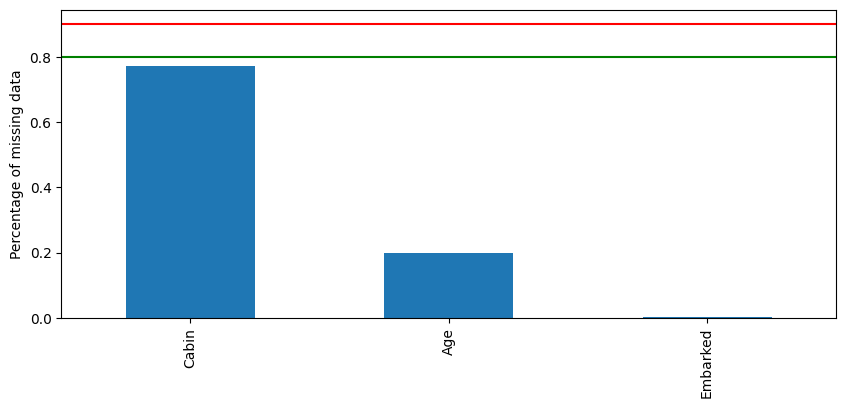

In [12]:
# plot
train_df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

## **6.5&nbsp;variáveis numéricas (considerações)**
* Cerca de 38% da amostra é de sobreviventes, o que garante o não desbalanceamento dos dados.
* Maioria dos passageiros viajavam sem pais ou filhos  (> 60%).
* Aproximadamente 50% viajava com irmãos ou cônjuge.
* Poucos passageiros pagaram por tickets de valor extramamente elevados (<1%)
* Poucas pessoas idosas (<1%) com idade entre 65-80.

In [13]:
# Numerical variable
train_df.describe()

PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33

## **6.6&nbsp;variáveis categóricas (considerações)**
* Maioria dos passageiros são homens (65%).
* Muitos números de 'Cabin' duplicados. Possivel motivo são os passageiros que compartilham cabine.
* Muitos Ticket com numeração repetidas (22%).

In [14]:
# Categorical variable
train_df.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

## **6.7&nbsp;Pivoting features**


In [15]:
(train_df[['Pclass', 'Survived']]
          .groupby(['Pclass'], as_index=False)
          .mean()
          .sort_values(by='Survived', ascending=False))

Pclass  Survived
0       1      0.63
1       2      0.47
2       3      0.24

In [16]:
(train_df[["Sex", "Survived"]]
          .groupby(['Sex'], as_index=False)
          .mean()
          .sort_values(by='Survived', ascending=False))

Sex  Survived
0  female      0.74
1    male      0.19

In [17]:
(train_df[["SibSp", "Survived"]]
          .groupby(['SibSp'], as_index=False)
          .mean()
          .sort_values(by='Survived', ascending=False))

SibSp  Survived
1      1      0.54
2      2      0.46
0      0      0.35
3      3      0.25
4      4      0.17
5      5      0.00
6      8      0.00

In [18]:
(train_df[["Parch", "Survived"]]
          .groupby(['Parch'], as_index=False)
          .mean()
          .sort_values(by='Survived', ascending=False))

Parch  Survived
3      3      0.60
1      1      0.55
2      2      0.50
0      0      0.34
5      5      0.20
4      4      0.00
6      6      0.00

## **6.8&nbsp;Análise visual (histogramas)**

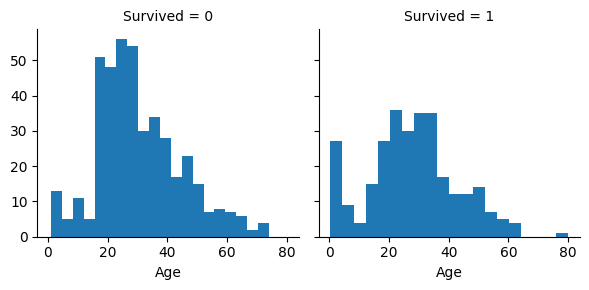

In [19]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

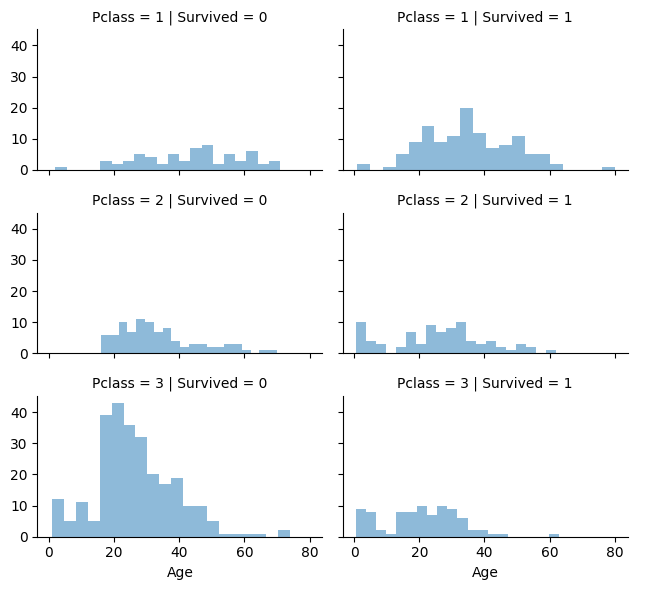

In [20]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6, height=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### **Considerações**
* Maioria dos passageiros com idade entre 15-35 anos
* Grande número de passageiros entre 15-25 anos morreram
* A 3ª classe foi a que teve maior número de passageiros que morrererma

#<mark style="background-color: yellow;">**7.&nbsp;Feature engineering**</mark>

In [21]:
# drop features
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [22]:
# Creating new feature
# Extraindo o título da variável Name, para posteriomente eliminação da variável name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [23]:
# Titulos que ocorrem poucas vezes foram classificados como Rare
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master      0.57
1    Miss      0.70
2      Mr      0.16
3     Mrs      0.79
4    Rare      0.35

In [24]:
# Categorizando os títulos (encoding)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                             Heikkinen, Miss. Laina  female 26.00      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                           Allen, Mr. William Henry    male 35.00      0   

   Parch  Fare Embarked  Title  
0      0  7.25        S      1  
1      0 71.28        C      3  
2      0  7.92        S      2  
3      0 53.10        S      3  
4      0  8.05        S      1

In [25]:
# removendo a variável name
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [26]:
# Categorizando a variável Sex (encoding)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked  Title
0         0       3    0 22.00      1      0  7.25        S      1
1         1       1    1 38.00      1      0 71.28        C      3
2         1       3    1 26.00      0      0  7.92        S      2
3         1       1    1 35.00      1      0 53.10        S      3
4         0       3    0 35.00      0      0  8.05        S      1

Completando a feature Age

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

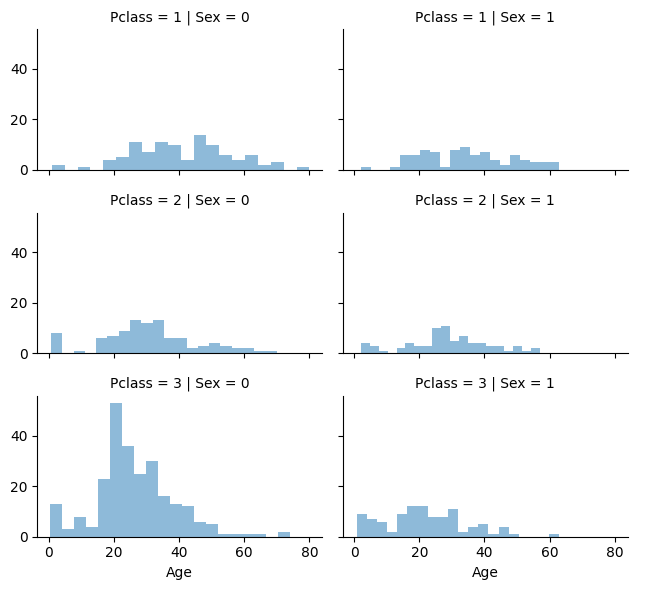

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6, height=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [28]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare Embarked  Title
0         0       3    0   22      1      0  7.25        S      1
1         1       1    1   38      1      0 71.28        C      3
2         1       3    1   26      0      0  7.92        S      2
3         1       1    1   35      1      0 53.10        S      3
4         0       3    0   35      0      0  8.05        S      1

Let us create Age bands and determine correlations with Survived.

In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]      0.55
1   (16.0, 32.0]      0.34
2   (32.0, 48.0]      0.41
3   (48.0, 64.0]      0.43
4   (64.0, 80.0]      0.09

Let us replace Age with ordinals based on these bands.

In [31]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare Embarked  Title  \
0         0       3    0    1      1      0  7.25        S      1   
1         1       1    1    2      1      0 71.28        C      3   
2         1       3    1    1      0      0  7.92        S      2   
3         1       1    1    2      1      0 53.10        S      3   
4         0       3    0    2      0      0  8.05        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

In [32]:
# Removing AgeBand
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare Embarked  Title
0         0       3    0    1      1      0  7.25        S      1
1         1       1    1    2      1      0 71.28        C      3
2         1       3    1    1      0      0  7.92        S      2
3         1       1    1    2      1      0 53.10        S      3
4         0       3    0    2      0      0  8.05        S      1

**Create new feature combining existing features**

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4      0.72
2           3      0.58
1           2      0.55
6           7      0.33
0           1      0.30
4           5      0.20
5           6      0.14
7           8      0.00
8          11      0.00

We can create another feature called IsAlone.

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0      0.51
1        1      0.30

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Pclass  Sex  Age  Fare Embarked  Title  IsAlone
0         0       3    0    1  7.25        S      1        0
1         1       1    1    2 71.28        C      3        0
2         1       3    1    1  7.92        S      2        1
3         1       1    1    2 53.10        S      3        0
4         0       3    0    2  8.05        S      1        1

We can also create an artificial feature combining Pclass and Age.

In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2

**Completing a categorical feature**

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance

In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C      0.55
1        Q      0.39
2        S      0.34

**Converting categorical feature to numeric**

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1  7.25         0      1        0          3
1         1       1    1    2 71.28         1      3        0          2
2         1       3    1    1  7.92         0      2        1          3
3         1       1    1    2 53.10         0      3        0          2
4         0       3    0    2  8.05         0      1        1          6

In [40]:
# Completanto dados faltantes usando mediana
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2  7.83         2      1        1          6
1          893       3    1    2  7.00         0      3        0          6
2          894       2    0    3  9.69         2      1        1          6
3          895       3    0    1  8.66         0      1        1          3
4          896       3    1    1 12.29         0      3        0          3

We can not create FareBand.

In [41]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]      0.20
1   (7.91, 14.454]      0.30
2   (14.454, 31.0]      0.45
3  (31.0, 512.329]      0.58

Convert the Fare feature to ordinal values based on the FareBand.

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6
5         0       3    0    1     1         2      1        1          3
6         0       1    0    3     3         0      1        1          3
7         0       3    0    0     2         0      4        0          0
8         1       3    1    1     1         0      3        0          3
9         1       2    1    0     2         1      3        0          0

In [43]:
test_df.head(10)

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6
3          895       3    0    1     1         0      1        1          3
4          896       3    1    1     1         0      3        0          3
5          897       3    0    0     1         0      1        1          0
6          898       3    1    1     0         2      2        1          3
7          899       2    0    1     2         0      1        0          2
8          900       3    1    1     0         1      3        1          3
9          901       3    0    1     2         0      1        0          3

#<mark style="background-color: yellow;">**8.&nbsp;Model training (PyCaret)**</mark>

https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac

##**8.1&nbsp;PyCaret - Data preparation**

In [44]:
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()
# X_train.shape, Y_train.shape, X_test.shape

In [45]:
# init setup
from pycaret.classification import *

In [46]:
train_df.head(3)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3

In [47]:
test_df.head(3)

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6

In [48]:
# Apenas para debugar
data = train_df.copy()

In [49]:
# s = setup(data, target = 'Churn', ignore_features = ['customerID'])
s = setup(data, target = 'Survived')

##**8.2&nbsp;PyCaret - Model Training & Selection**

In [50]:
# compare all models
best_model = compare_models(sort='AUC')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [51]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=478, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##**8.3&nbsp;Hyperparameter Tuning**

You can use the tune_model function from PyCaret to automatically tune the hyperparameters of the model.

In [52]:
# tune best model
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##**8.4&nbsp;Model Analysis**

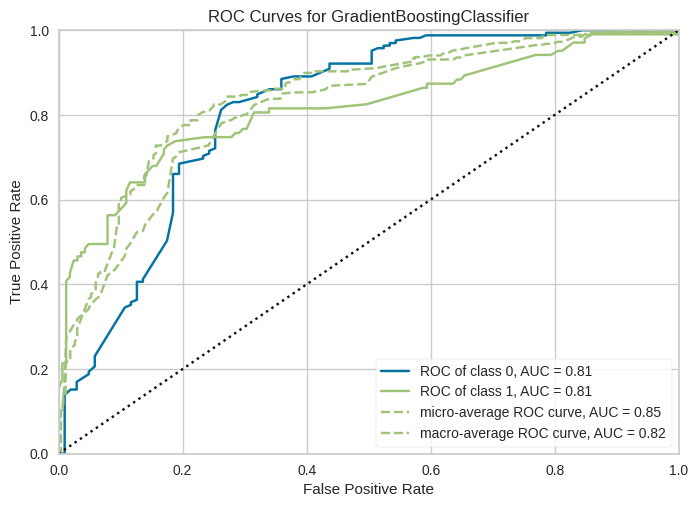

In [53]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

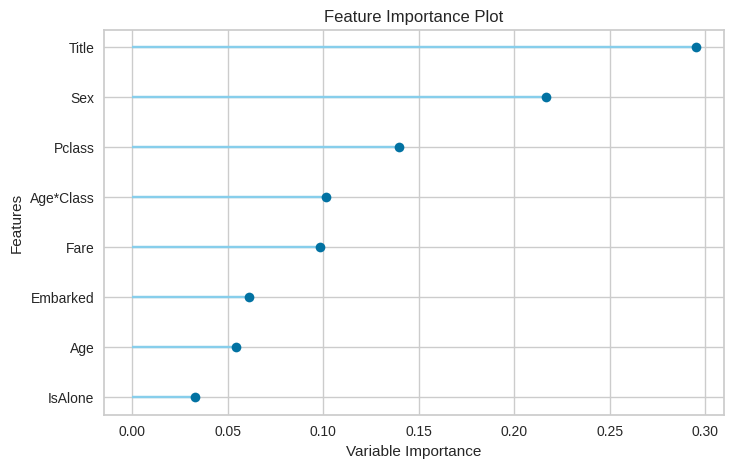

In [54]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

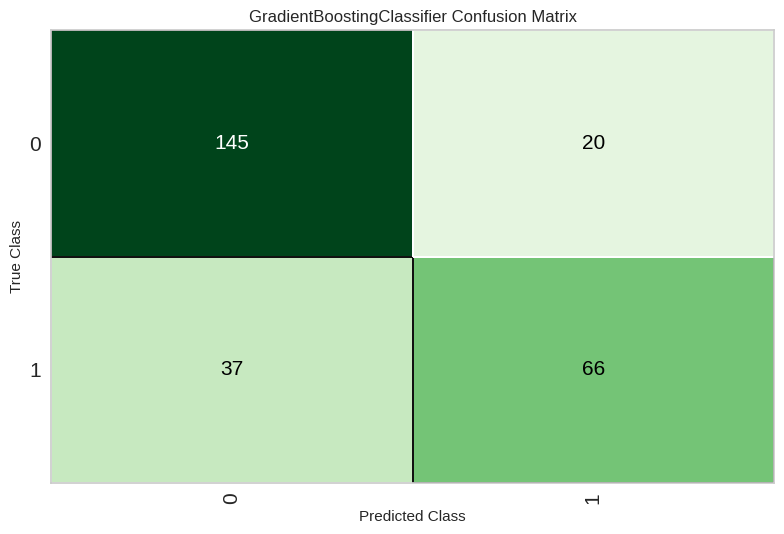

In [55]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [56]:
X_test_aux  = test_df.drop("PassengerId", axis=1).copy()

In [57]:
prediction = tuned_best_model.predict(X_test_aux)

In [58]:
count_zeros = np.count_nonzero(prediction == 0)
count_ones = np.count_nonzero(prediction == 1)

print(f"Número de zeros: {count_zeros}")
print(f"Número de uns: {count_ones}")

Número de zeros: 263
Número de uns: 155


#<mark style="background-color: yellow;">**9.&nbsp;Explicabilidade do modelo**</mark>

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this?

A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions


In [59]:
val_X  = test_df.drop("PassengerId", axis=1).copy()

In [114]:
row_to_show = 1
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

tuned_best_model.predict_proba(data_for_prediction_array)

array([[0.81167051, 0.18832949]])

In [115]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(tuned_best_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [117]:
explainer.expected_value

array([-0.71715824])

In [118]:
shap.initjs()
link=["identity","logit"]
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction, link=link[0])

#<mark style="background-color: yellow;">**10.&nbsp;Próximos passos**</mark>
* Reescrita do código em formato de pipeline.
* Incluir o preprocessamento no pipeline pois somente assim podemos fazer previsões online.
* Treinar pipeline.
* Deploy do pipeline para um endpoint.
* Elaboração da documentação.
